In [1]:
from clickhouse_driver import Client
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
client = Client(host='oleg.orbita.work', port=9000, user='student_ml', password='CGRV8zemLGgsfdz7Uc6ZJeisGTcPQa', settings={'use_numpy': True})

## 1. Загрузите данные из таблицы `game_sales`, которая находится в базе `students_datas`

Создадим SQL-запрос для загрузки данных из таблицы `game_sales`

In [3]:
query = "SELECT * FROM students_datas.game_sales"

In [4]:
rows = client.execute(query) 

Выведем часть таблицы

In [5]:
df = pd.DataFrame(rows)
df

,0,1,2,3,4,5,6,7,8,9
0,Pac-Man,2600,1982.0,Puzzle,Atari,7.28,0.45,0.0,0.08,7.81
1,Pitfall!,2600,1981.0,Platform,Activision,4.21,0.24,0.0,0.05,4.50
2,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
3,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
4,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.0,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...
16593,Sébastien Loeb Rally Evo,XOne,2016.0,Racing,Milestone S.r.l,0.00,0.01,0.0,0.00,0.01
16594,Hitman (2016),XOne,2016.0,Action,Square Enix,0.00,0.01,0.0,0.00,0.01
16595,Mighty No. 9,XOne,2016.0,Platform,Deep Silver,0.01,0.00,0.0,0.00,0.01
16596,Resident Evil 4 HD,XOne,2016.0,Shooter,Capcom,0.01,0.00,0.0,0.00,0.01


Добавим наименования столбцов и преобразуем формат данных у столбца `Year` в таблице для дальнейшей обработки

In [6]:
# Добавляем названия для столбцов
new_columns = ['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'] 
df.columns = new_columns

# Меняем тип данных у года на корректный
type_change = {'Year' : 'Int64'} 
df = df.astype(type_change)

df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Pac-Man,2600,1982,Puzzle,Atari,7.28,0.45,0.0,0.08,7.81
1,Pitfall!,2600,1981,Platform,Activision,4.21,0.24,0.0,0.05,4.50
2,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
3,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
4,Space Invaders,2600,<NA>,Shooter,Atari,2.36,0.14,0.0,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...
16593,Sébastien Loeb Rally Evo,XOne,2016,Racing,Milestone S.r.l,0.00,0.01,0.0,0.00,0.01
16594,Hitman (2016),XOne,2016,Action,Square Enix,0.00,0.01,0.0,0.00,0.01
16595,Mighty No. 9,XOne,2016,Platform,Deep Silver,0.01,0.00,0.0,0.00,0.01
16596,Resident Evil 4 HD,XOne,2016,Shooter,Capcom,0.01,0.00,0.0,0.00,0.01


## 2. Проанализируйте полученные графики и сделайте выводы

#### Игры каких жанров были наиболее популярны до 2000 года, а какие после?

In [7]:
# Разделение данных на 2 группы: до и после 2000 года
df_bef2k = df[df['Year'] < 2000]
df_aft2k = df[df['Year'] >= 2000]

# Удаление повторяющихся игр (выпущенных на разных платформах)
df_bef2k = df_bef2k.drop_duplicates(subset=['Name'])
df_aft2k = df_aft2k.drop_duplicates(subset=['Name'])

# Количество игр и объемы продаж до 2000 года по жанрам
counts_bef2k = df_bef2k['Genre'].value_counts()
sales_bef2k = df_bef2k.groupby('Genre')['Global_Sales'].sum()

# Количество игр и объемы продаж после 2000 года по жанрам
counts_aft2k = df_aft2k['Genre'].value_counts()
sales_aft2k = df_aft2k.groupby('Genre')['Global_Sales'].sum()

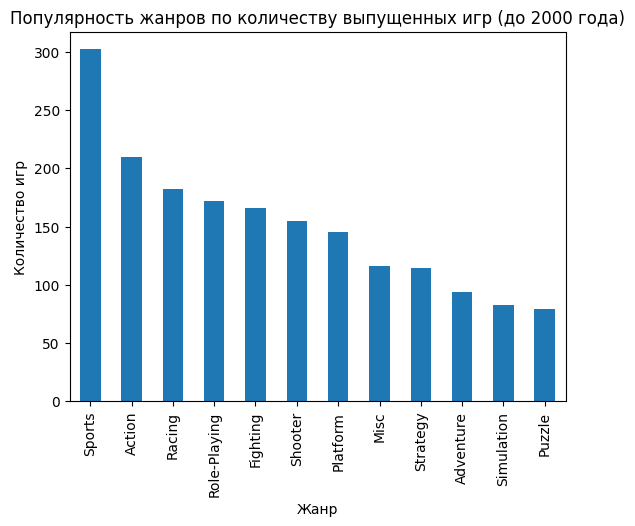

In [8]:
counts_bef2k.plot(kind='bar')
plt.title('Популярность жанров по количеству выпущенных игр (до 2000 года)')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.show()

Исходя из данного графика мы можем сделать вывод, что наиболее популярным жанром до 2000 года по количеству выпущенных игр были Спортивные игры (`Sports`), а наименее популярным - Головоломки (`Puzzle`)

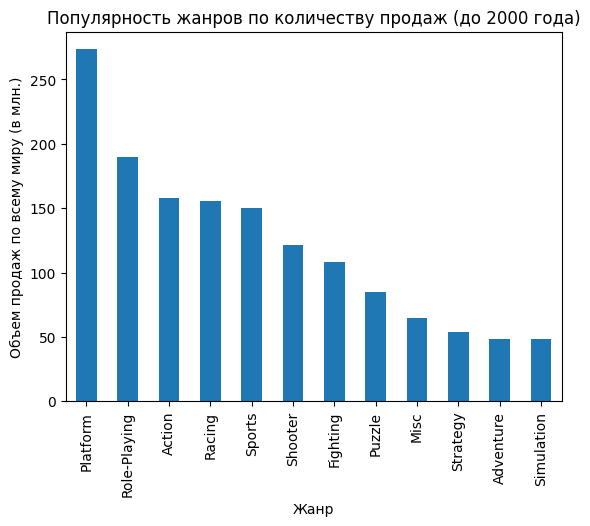

In [9]:
sales_bef2k.sort_values(ascending=False).plot(kind='bar')
plt.title('Популярность жанров по количеству продаж (до 2000 года)')
plt.xlabel('Жанр')
plt.ylabel('Объем продаж по всему миру (в млн.)')
plt.show()

Исходя из данного графика мы можем сделать вывод, что наиболее популярным жанром до 2000 года по количеству продаж были Платформеры (`Platform`), а наименее популярным - Симуляторы (`Simulation`)

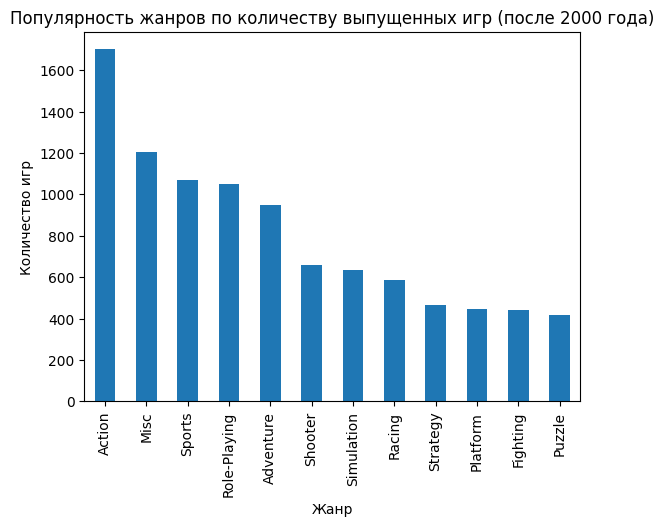

In [10]:
counts_aft2k.plot(kind='bar')
plt.title('Популярность жанров по количеству выпущенных игр (после 2000 года)')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.show()

Исходя из данного графика мы можем сделать вывод, что наиболее популярным жанром после 2000 года по количеству выпущенных игр является Экшен (`Action`), а наименее популярным - Головоломки (`Puzzle`)

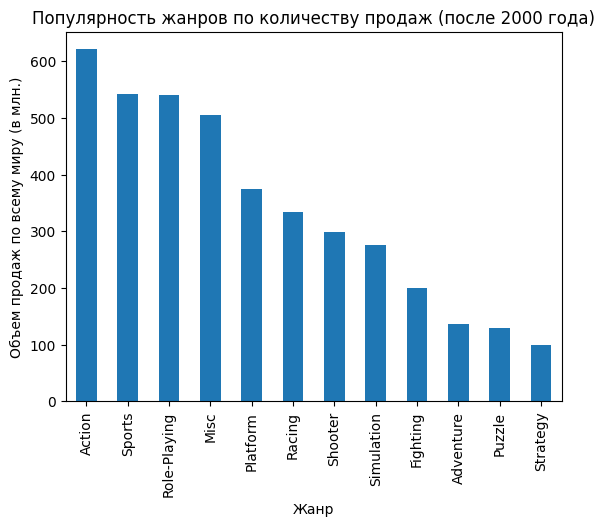

In [11]:
sales_aft2k.sort_values(ascending=False).plot(kind='bar')
plt.title('Популярность жанров по количеству продаж (после 2000 года)')
plt.xlabel('Жанр')
plt.ylabel('Объем продаж по всему миру (в млн.)')
plt.show()

Исходя из данного графика мы можем сделать вывод, что наиболее популярным жанром после 2000 года по количеству продаж является Экшен (`Action`), а наименее популярным - Стратегии (`Strategy`)

## 3. Отобразите на графике общее число видеоигр, выпущенных в каждом году

In [12]:
# Подсчет количества игр для каждого года
years = df['Year'].value_counts().sort_index()

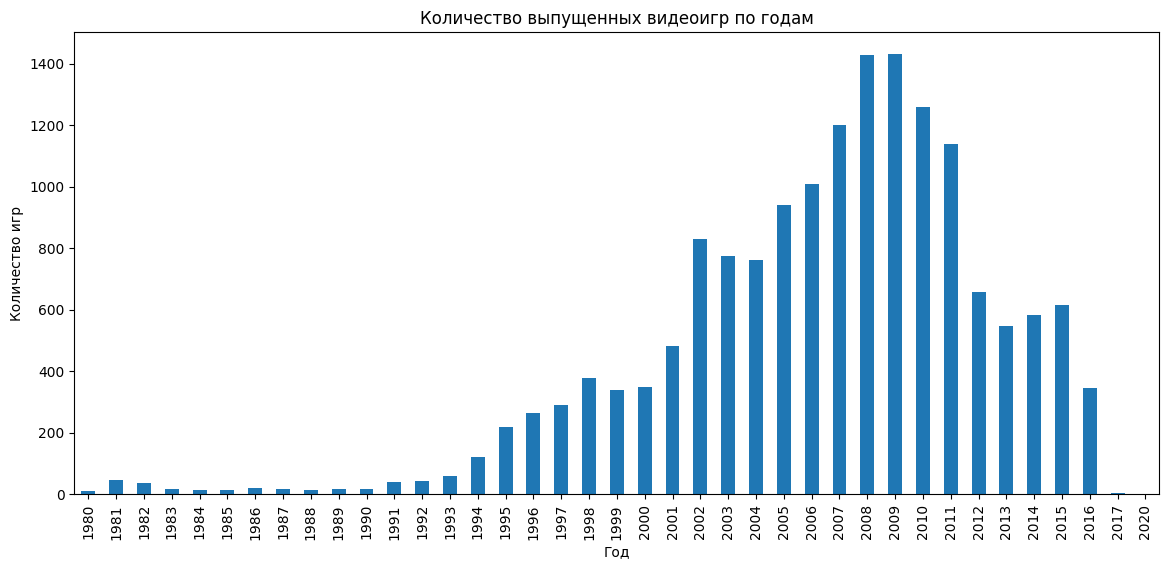

In [13]:
years.plot(kind='bar', figsize=(14, 6))
plt.title('Количество выпущенных видеоигр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

На графике мы видим, что в 90-е годы начался рост количества выпускаемых видеоигр. Своего пика он достиг в 2008-2009 годах, после чего начался спад

## 4. Определите трех издателей, выпустивших наибольшее количество видеоигр

#### Изобразите количество выпущенных издателями видеоигр для каждой платформы

In [14]:
# Подсчет количества игр для каждого издателя
publishers = df['Publisher'].value_counts()

# Выделяем трех самых популярных издателей
top3 = publishers.head(3)

# Подсчет количества игр на разных платформах
df_top3 = df[df['Publisher'].isin(top3.index)]
platforms = df_top3.groupby(['Publisher', 'Platform']).size().unstack()

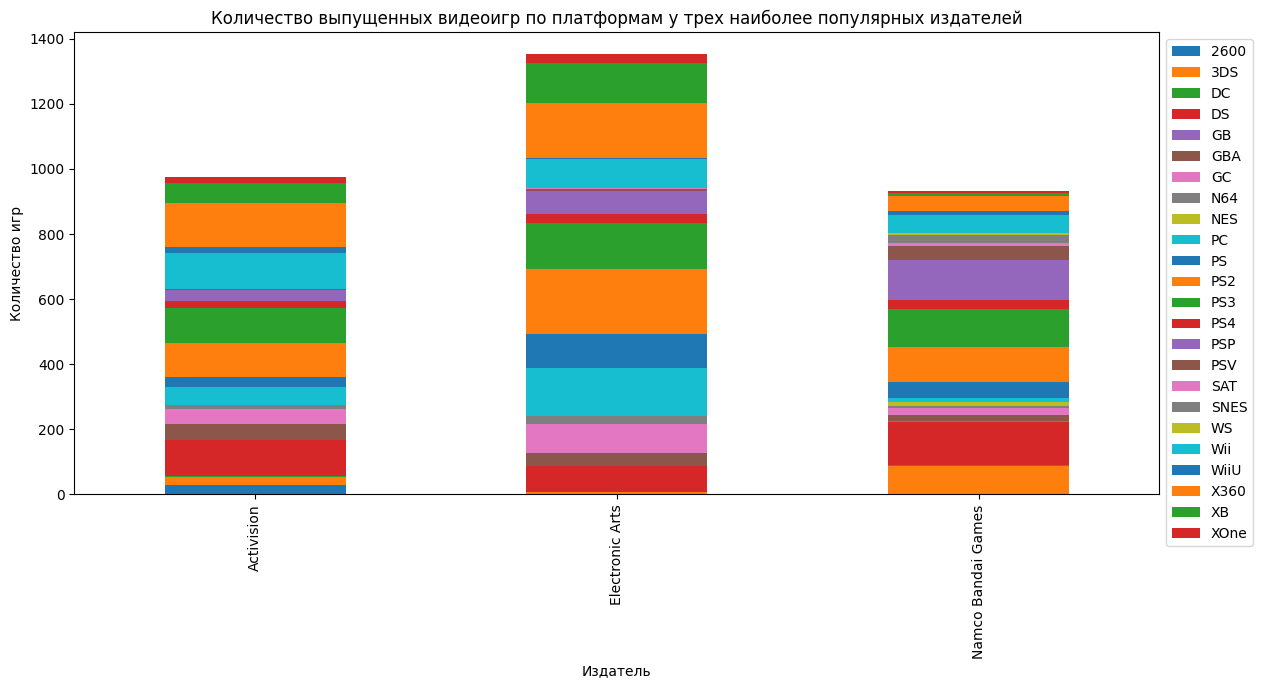

In [15]:
platforms.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title('Количество выпущенных видеоигр по платформам у трех наиболее популярных издателей')
plt.xlabel('Издатель')
plt.ylabel('Количество игр')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

Исходя из данного графика мы можем сделать вывод, что наиболее популярнами издателями являются:
1. Electronic Arts
2. Activision
3. Namco Bandai Games

## 5. Отобразите на круговых диаграммах доли суммарного объема продаж с 1980 г. до 2000 г. и с 2000 г. до 2020 г. в Северной Америке, Европе, Японии от объема продаж по всему миру

In [16]:
# Подсчет суммарного объема продаж по регионам
sales_bef2k = df_bef2k[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
sales_aft2k = df_aft2k[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

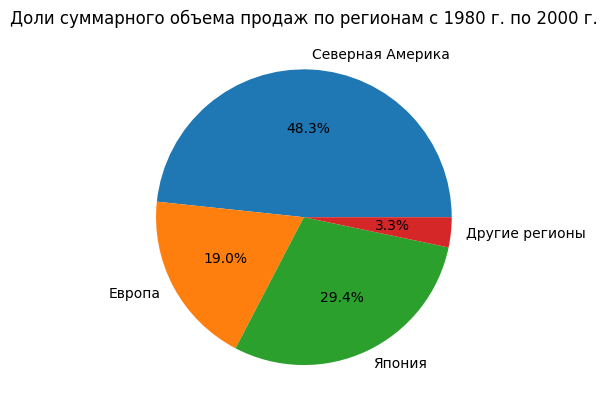

In [17]:
plt.pie(sales_bef2k, labels=['Северная Америка', 'Европа', 'Япония', 'Другие регионы'], autopct='%1.1f%%')
plt.title('Доли суммарного объема продаж по регионам c 1980 г. по 2000 г.')
plt.show()

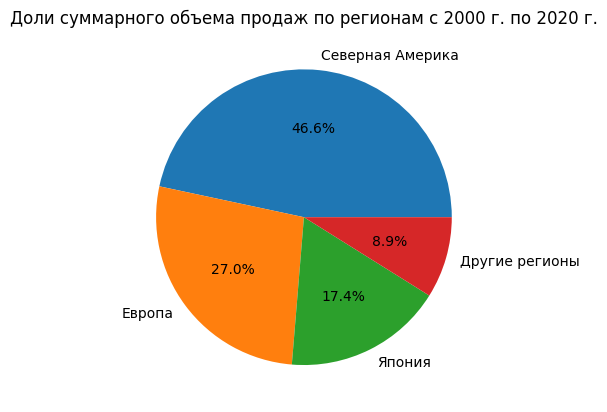

In [18]:
plt.pie(sales_aft2k, labels=['Северная Америка', 'Европа', 'Япония', 'Другие регионы'], autopct='%1.1f%%')
plt.title('Доли суммарного объема продаж по регионам c 2000 г. по 2020 г.')
plt.show()

Исходя из данных диаграмм мы можем увидеть незначительное снижение доли объема продаж у Северной Америки, значительное увеличение доли у Европы и других регионов, а также значительное снижение доли продаж у Японии